In [1]:
import pandas as pd
import numpy as np

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
data = pd.read_csv("us-counties.csv")

In [3]:
data = pd.DataFrame(data)
del data['fips']

In [4]:
data.head(8)

,date,county,state,cases,deaths
0,1/21/2020,Snohomish,Washington,1,0
1,1/22/2020,Snohomish,Washington,1,0
2,1/23/2020,Snohomish,Washington,1,0
3,1/24/2020,Cook,Illinois,1,0
4,1/24/2020,Snohomish,Washington,1,0
5,1/25/2020,Orange,California,1,0
6,1/25/2020,Cook,Illinois,1,0
7,1/25/2020,Snohomish,Washington,1,0


In [16]:
april_8th_cases = pd.DataFrame(data)

april_8th_cases = april_8th_cases[april_8th_cases["date"] == '4/4/2020']

april_8th_cases = april_8th_cases.groupby('state').sum()

april_8th_cases = april_8th_cases.sort_values(by=['cases'], ascending = False)

april_8th_cases

,cases,deaths
state,,
New York,114996,3568
New Jersey,34124,847
Michigan,14225,542
California,13796,323
Louisiana,12492,412
Massachusetts,11736,216
Florida,11537,194
Illinois,10358,248
Pennsylvania,10110,141


In [6]:
march_28th_cases = pd.DataFrame(data)

march_28th_cases = march_28th_cases[march_28th_cases["date"] == '3/28/2020']

march_28th_cases = march_28th_cases.groupby('state').sum()

In [7]:
size = ((april_8th_cases["cases"] - march_28th_cases["cases"])/march_28th_cases["cases"]) * 100

X = april_8th_cases["cases"]
Y = april_8th_cases["deaths"]

size

state
Alabama                     126.805556
Alaska                       67.647059
Arizona                     161.190168
Arkansas                     60.475162
California                  147.817496
Colorado                    121.715948
Connecticut                 246.194226
Delaware                    177.102804
District of Columbia        163.742690
Florida                     185.640010
Georgia                     160.743464
Guam                        291.228070
Hawaii                      132.666667
Idaho                       311.068702
Illinois                    187.562465
Indiana                     220.698052
Iowa                        163.758389
Kansas                      157.720588
Kentucky                    130.402010
Louisiana                   276.491863
Maine                       114.084507
Maryland                    193.151970
Massachusetts               175.687104
Michigan                    206.771620
Minnesota                    94.819820
Mississippi        

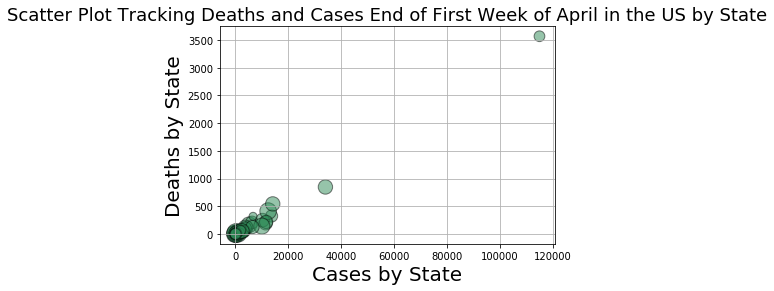

In [8]:
#Scatter plot of the states
plt.scatter("cases", "deaths", alpha = 0.5, color = 'seagreen', edgecolor = 'black', s=size, data = april_8th_cases)

plt.xlabel("Cases by State", size=20)
plt.ylabel("Deaths by State", size=20)
plt.title("Scatter Plot Tracking Deaths and Cases End of First Week of April in the US by State", size=18)

plt.grid()

plt.show()

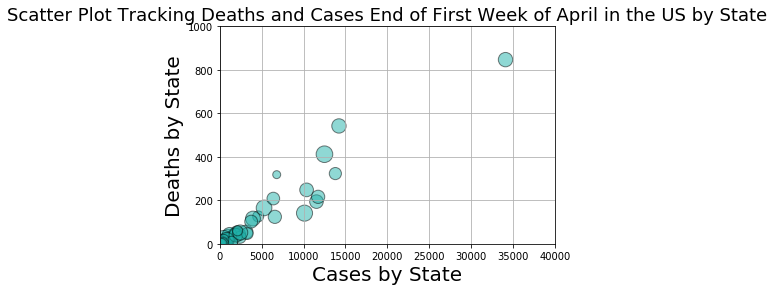

In [42]:
#Scatter plot of the states
plt.scatter("cases", "deaths", alpha = 0.5, color = 'lightseagreen', edgecolor = 'black', s=size, data = april_8th_cases)

plt.xlabel("Cases by State", size=20)
plt.ylabel("Deaths by State", size=20)
plt.title("Scatter Plot Tracking Deaths and Cases End of First Week of April in the US by State", size=18)

plt.xlim(0,40000)
plt.ylim(0,1000)

plt.grid()

plt.show()

In [9]:
april_8_cases = pd.DataFrame(april_8th_cases)

del april_8_cases['deaths']

In [ ]:
april_8_cases_graph = april_8th_cases.head(10)

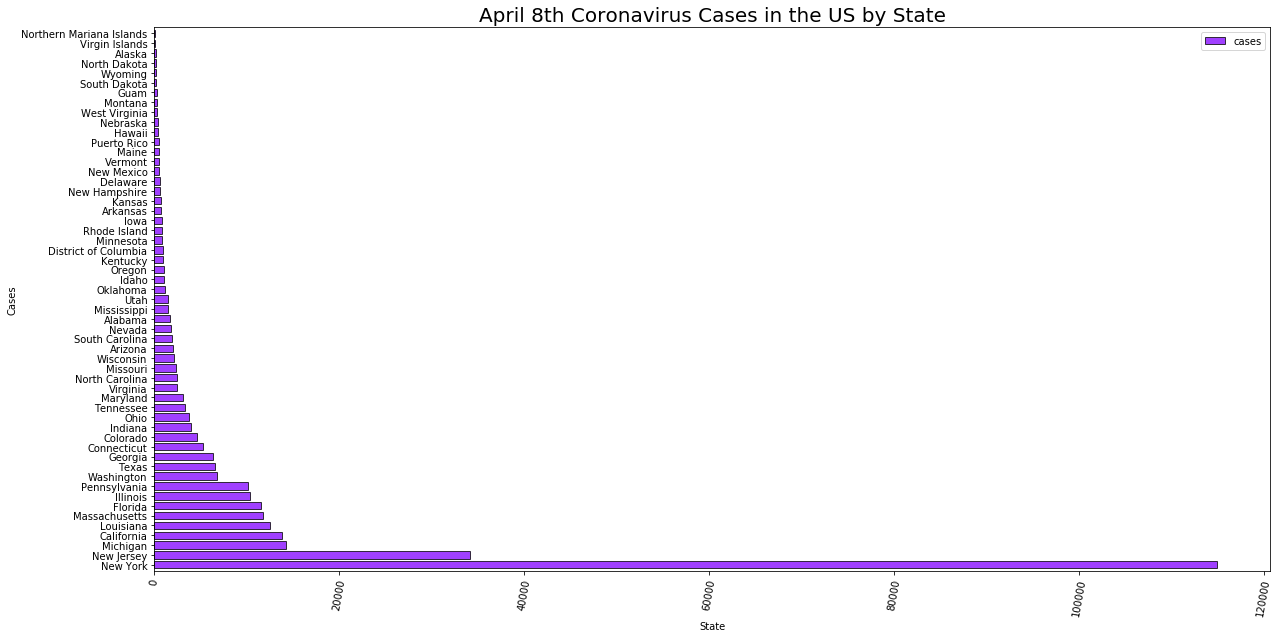

In [11]:
april_8_cases_sort = april_8_cases_graph.sort_values('cases', ascending=False)

colors = cm.rainbow(np.linspace(0, 1, 10))

april_8_cases_sort.plot.barh(color = colors, edgecolor = "black", alpha = 0.75, figsize = (20,10), width=0.75)

plt.xticks(rotation=80)

plt.xlabel("State")
plt.ylabel("Cases")

plt.title("April 8th Coronavirus Cases in the US by State", fontsize = 20)
plt.show()

In [8]:
apr_8_cloud = data[["state", "cases", "date"]]

apr_8_cloud = apr_8_cloud[apr_8_cloud["date"] == "4/8/2020"]

apr_8_cloud = apr_8_cloud[apr_8_cloud["cases"] > 0]

apr_8_cloud

,state,cases,date
40720,Alabama,12,4/8/2020
40721,Alabama,49,4/8/2020
40722,Alabama,3,4/8/2020
40723,Alabama,9,4/8/2020
40724,Alabama,10,4/8/2020
40725,Alabama,3,4/8/2020
40726,Alabama,3,4/8/2020
40727,Alabama,52,4/8/2020
40728,Alabama,140,4/8/2020
40729,Alabama,7,4/8/2020


In [9]:
#Wordcloud attempt for states
#text = " ".join(state for state in apr_8_cloud.state)

text = apr_8_cloud['state'].sum()

print ("There are {} words in the combination of all review.".format(len(text)))

There are 20994 words in the combination of all review.


In [10]:
#text

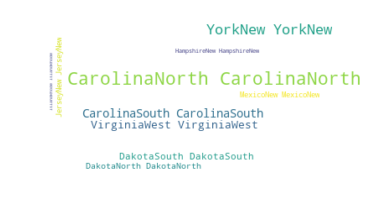

In [11]:
# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(str(text))

# Display the generated image:



plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#Size correlates to how many counties have confirmed cases in each state

In [53]:
#Line graph detailing the growth of cases using the data df
state_growth = pd.DataFrame(data)

state_growth = state_growth.groupby(['state','date']).sum()

state_growth

cases  deaths
state     date                    
Alabama   3/13/2020      6       0
          3/14/2020     12       0
          3/15/2020     23       0
          3/16/2020     29       0
          3/17/2020     39       0
          3/18/2020     51       0
          3/19/2020     78       0
          3/20/2020    106       0
          3/21/2020    131       0
          3/22/2020    157       0
          3/23/2020    196       0
          3/24/2020    242       0
          3/25/2020    386       1
          3/26/2020    538       3
          3/27/2020    639       4
          3/28/2020    720       4
          3/29/2020    830       5
          3/30/2020    947      11
          3/31/2020    999      14
          4/1/2020    1108      28
          4/2/2020    1270      32
          4/3/2020    1535      38
          4/4/2020    1633      44
          4/5/2020    1841      45
          4/6/2020    2006      53
          4/7/2020    2197      64
          4/8/2020    2499      67
Alaska    3/12/2020      1       0
          3/13/2020      1       0
          3/14/2020      1       0
...                    ...     ...
Wisconsin 4/8/2020    2756     107
Wyoming   3/11/2020      1       0
          3/12/2020      1       0
          3/13/2020      2       0
          3/14/2020      3       0
          3/15/2020      3       0
          3/16/2020     10       0
          3/17/2020     15       0
          3/18/2020     17       0
          3/19/2020     18       0
          3/20/2020     22       0
          3/21/2020     24       0
          3/22/2020     26       0
          3/23/2020     28       0
          3/24/2020     37       0
          3/25/2020     49       0
          3/26/2020     56       0
          3/27/2020     74       0
          3/28/2020     85       0
          3/29/2020     88       0
          3/30/2020     96       0
          3/31/2020    121       0
          4/1/2020     138       0
          4/2/2020     154       0
          4/3/2020     167       0
          4/4/2020     188       0
          4/5/2020     200       0
          4/6/2020     213       0
          4/7/2020     221       0
          4/8/2020     200       0

[2049 rows x 2 columns]

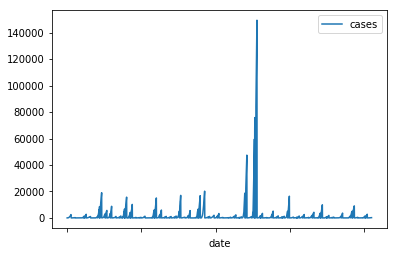

In [56]:
state_growth.reset_index().plot(x='date', y='cases')

plt.show()

In [60]:
california_state_growth = pd.DataFrame(data)

california_state_growth = california_state_growth[california_state_growth["state"] == 'California']

In [61]:
california_state_growth = california_state_growth.groupby(['state','date']).sum()

california_state_growth

cases  deaths
state      date                    
California 1/25/2020      1       0
           1/26/2020      2       0
           1/27/2020      2       0
           1/28/2020      2       0
           1/29/2020      2       0
           1/30/2020      2       0
           1/31/2020      3       0
           2/1/2020       3       0
           2/10/2020      7       0
           2/11/2020      7       0
           2/12/2020      7       0
           2/13/2020      7       0
           2/14/2020      7       0
           2/15/2020      7       0
           2/16/2020      7       0
           2/17/2020      7       0
           2/18/2020      7       0
           2/19/2020      7       0
           2/2/2020       6       0
           2/20/2020      8       0
           2/21/2020      9       0
           2/22/2020      9       0
           2/23/2020      9       0
           2/24/2020     11       0
           2/25/2020     11       0
           2/26/2020     26       0
           2/27/2020     26       0
           2/28/2020     27       0
           2/29/2020     28       0
           2/3/2020       6       0
...                     ...     ...
           3/18/2020    893      17
           3/19/2020   1067      19
           3/2/2020      38       0
           3/20/2020   1283      24
           3/21/2020   1544      28
           3/22/2020   1851      35
           3/23/2020   2239      39
           3/24/2020   2645      52
           3/25/2020   3184      68
           3/26/2020   4061      83
           3/27/2020   4916     104
           3/28/2020   5567     122
           3/29/2020   6322     132
           3/3/2020      45       0
           3/30/2020   7422     147
           3/31/2020   8584     184
           3/4/2020      55       1
           3/5/2020      67       1
           3/6/2020      81       1
           3/7/2020     100       1
           3/8/2020     112       1
           3/9/2020     172       2
           4/1/2020    9858     211
           4/2/2020   11190     246
           4/3/2020   12568     282
           4/4/2020   13796     323
           4/5/2020   15202     351
           4/6/2020   16361     386
           4/7/2020   17539     447
           4/8/2020   19043     506

[75 rows x 2 columns]